In [23]:
import numpy as np

from sklearn.metrics import pairwise_distances_argmin
from skimage import color
from sklearn import cluster
from sklearn import metrics
import cv2
import matplotlib.pyplot as plt

In [12]:
def quantize(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))

    model = cluster.KMeans(n_clusters=n_colors)
    labels = model.fit_predict(reshaped_raster)
    palette = model.cluster_centers_

    quantized_raster = np.reshape(
        palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

In [13]:
raster = cv2.imread("img/baboon.png")

raster16 = quantize(raster,16)
raster32 = quantize(raster,32)
raster64 = quantize(raster,64)
raster128 = quantize(raster,128)

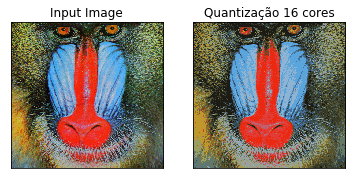

In [26]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster, axis=2))

a = fig.add_subplot(1, 2, 2)
plt.title('Quantização 16 cores'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster16, axis=2)/255)

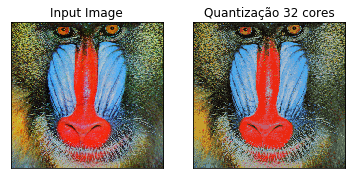

In [27]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster, axis=2))

a = fig.add_subplot(1, 2, 2)
plt.title('Quantização 32 cores'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster32, axis=2)/255)

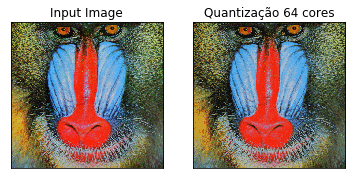

In [30]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster, axis=2))

a = fig.add_subplot(1, 2, 2)
plt.title('Quantização 64 cores'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster64, axis=2)/255)

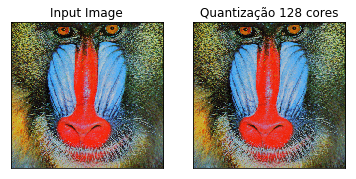

In [31]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster, axis=2))

a = fig.add_subplot(1, 2, 2)
plt.title('Quantização 128 cores'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(np.flip(raster128, axis=2)/255)

In [18]:
cv2.imwrite("res/raster16.png",raster16)
cv2.imwrite("res/raster32.png",raster32)
cv2.imwrite("res/raster64.png",raster64)
cv2.imwrite("res/raster128.png",raster128)

True